In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import math
import statistics as st
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('cubic_zirconia.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [8]:
df.shape

(26967, 11)

In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<AxesSubplot:>

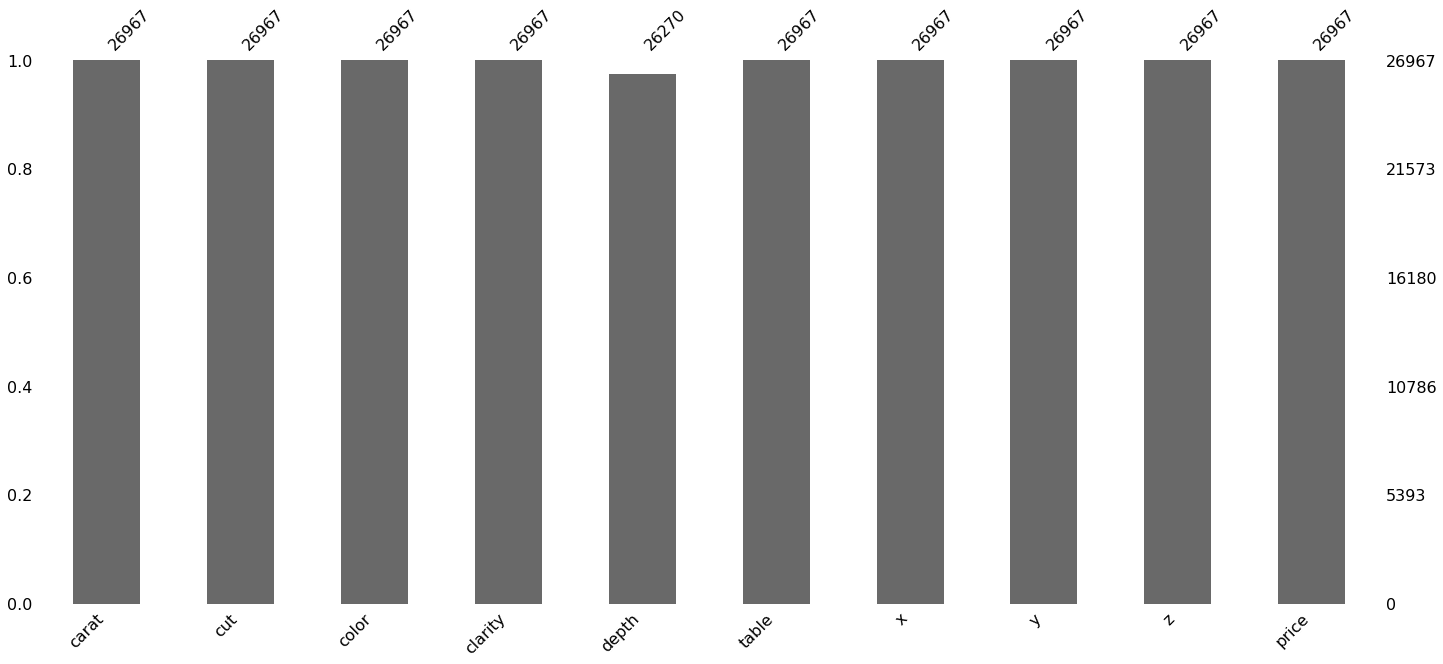

In [11]:
import missingno as msng
msng.bar(df)

In [12]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
## % of missingvalues
(697/26967)*100

2.5846404865205623

#### Only 2.5% data has missing values, it is safe to drop the missing values. But as we have to impute the missing values, we can do so either by using the mean or the median of the specific column or attribute. And this decision would depend on whthere there are outliers present in the specific features If there are outliers, it would be better to go ahead with the median rather than the mean of the column as mean is a stratistic which is highkly impacted by teh presence of the outliers. On teh other hand, median is a statistic measure that is robust to the presence of the outliers in the column.

In [14]:
df['depth'] = df['depth'].fillna(df['depth'].median())

In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
df.shape

(26967, 10)

In [17]:
df.duplicated().sum()

34

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(26933, 10)

In [20]:
(df==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

**There are 2 rows in which x=0,2 rows with y=0 and 8 rows with z=0 Logically its not possible to have length width and height of a tangible stone as 0**

In [21]:
df[(df['x']=='0') | (df['y']=='0') | (df['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [22]:
8/26933*100

0.02970333791259793

**These 8 rows represent only 0.03% of the dataset observations and hence its safe to drop these rows.**

In [23]:
df=df.drop(labels=[5821,6034,10827,12498,12689,17506,18194,23758], axis=0)

In [24]:
df.shape

(26925, 10)

In [25]:
(df==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
df.cut.value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [27]:
df.cut.value_counts(normalize=True)

Ideal        0.401300
Premium      0.255525
Very Good    0.223844
Good         0.090399
Fair         0.028932
Name: cut, dtype: float64

In [28]:
df.color.value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [29]:
df.color.value_counts(normalize=True)

G    0.209842
E    0.182581
F    0.175376
H    0.151941
D    0.124085
I    0.102693
J    0.053482
Name: color, dtype: float64

In [30]:
df.clarity.value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [31]:
df.clarity.value_counts(normalize=True)

SI1     0.243788
VS2     0.226258
SI2     0.169396
VS1     0.151755
VVS2    0.093965
VVS1    0.068301
IF      0.033092
I1      0.013445
Name: clarity, dtype: float64

In [32]:
df.table.describe()

count    26925.000000
mean        57.455305
std          2.231327
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

In [33]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.percentile(_series,.25) - (1.5*iqr(_series))
    ub = np.percentile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.percentile(_series,.25),
           np.percentile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [34]:
categoriacl_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print(categoriacl_features) 
print(numerical_features)



['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [37]:
stat_df(df, numerical_features).T

,carat,depth,table,x,y,z,price
TOTAL RECORDS,26925.00,26925.00,26925.00,26925.00,26925.00,26925.00,26925.00
NULL COUNT,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZERO COUNT,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NEGATIVE COUNT,0.00,0.00,0.00,0.00,0.00,0.00,0.00
MIN,0.20,50.80,49.00,3.73,3.71,1.07,326.00
MAX,4.50,73.60,79.00,10.23,58.90,31.80,18818.00
RANGE,4.30,22.80,30.00,6.50,55.19,30.73,18492.00
MEAN,0.80,61.75,57.46,5.73,5.73,3.54,3936.25
MEDIAN,0.23,57.40,53.00,3.96,3.99,2.44,400.62
MODE,0.30,61.80,56.00,4.38,4.35,2.69,544.00


In [38]:
outlier_percentage_df(df, numerical_features)

,% OUTLIERS
depth,91.84
table,44.92
x,19.00
z,18.81
y,18.74
price,17.20
carat,16.32


In [39]:
df.depth.median()

61.8

## Univariate Analysis

In [40]:
# Putting all Categorical columns in one dataframe
df_num=df.drop(['cut','color','clarity'],axis=1)

In [41]:
# Putting all Numerical columns in one dataframe
df_cat=df.drop(['carat','depth','table','price','x','y','z'],axis=1)

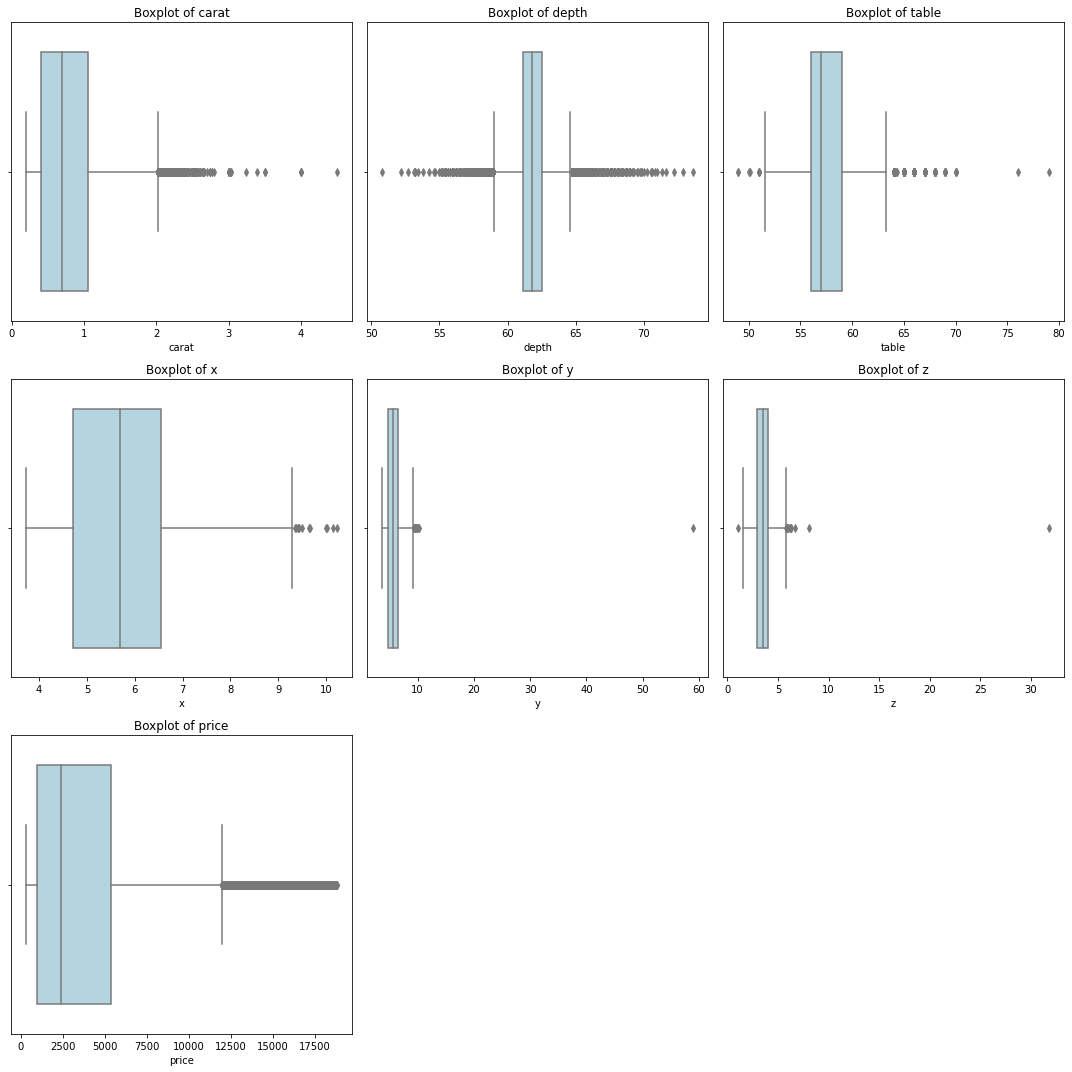

In [42]:
plt.figure(figsize=(15,15))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = df_num[list_of_column[i]],data=df_num,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()
    

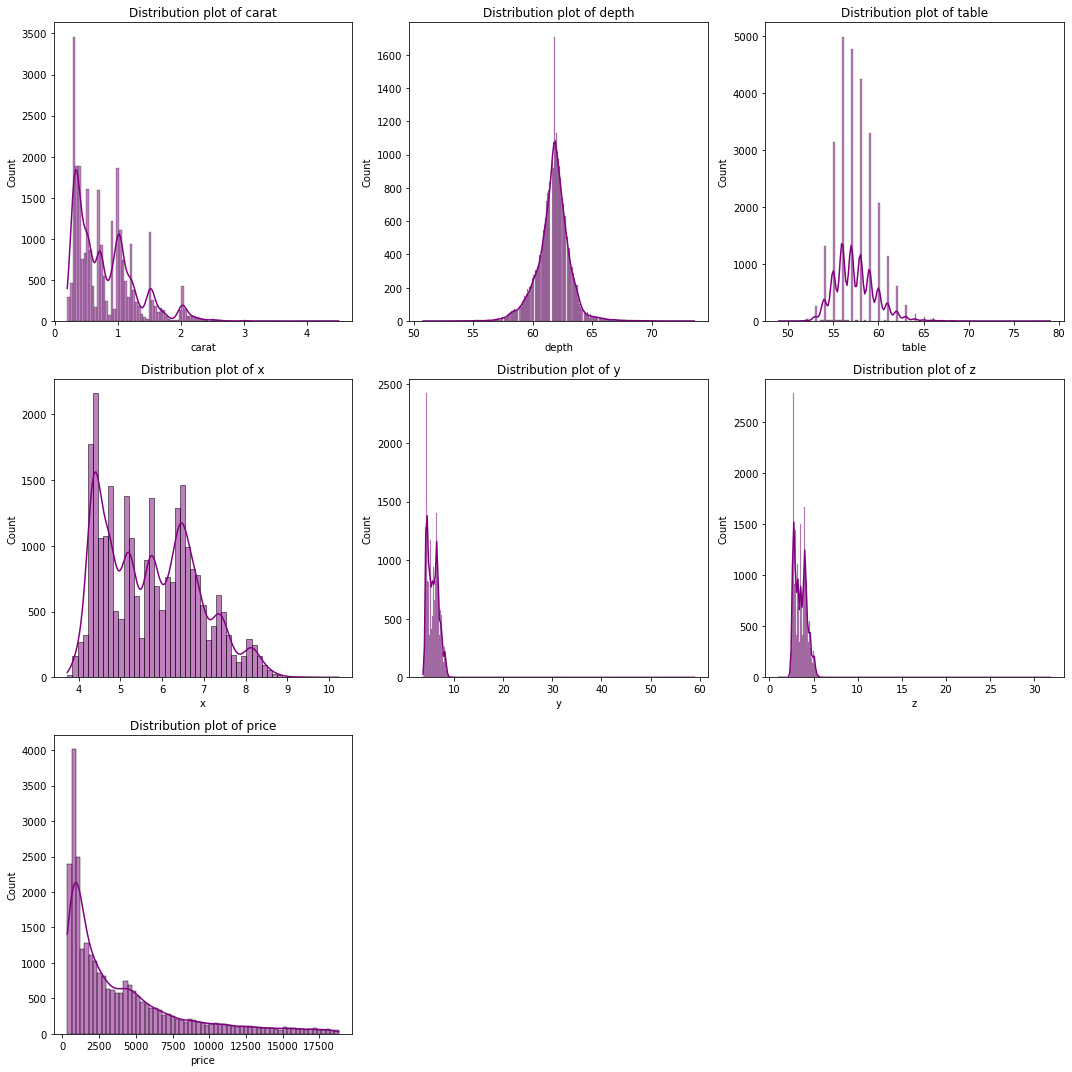

In [43]:
plt.figure(figsize=(15,15))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,3,i+1)
    sns.histplot(x = df_num[list_of_column[i]],data=df_num,kde=True,color='purple')
    plt.title('Distribution plot of {}'.format(list_of_column[i]))
    plt.tight_layout()

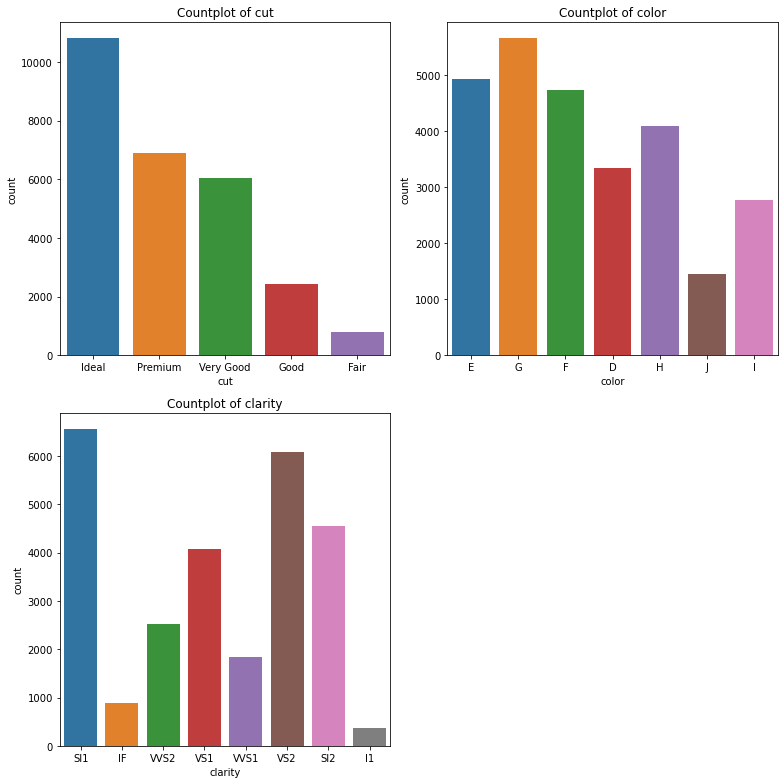

In [44]:
plt.figure(figsize=(11,11))
list_of_column=df_cat.columns

for i in range(len(list_of_column)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df_cat[list_of_column[i]],data=df_cat)
    plt.title('Countplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

## Bivariate Analysis

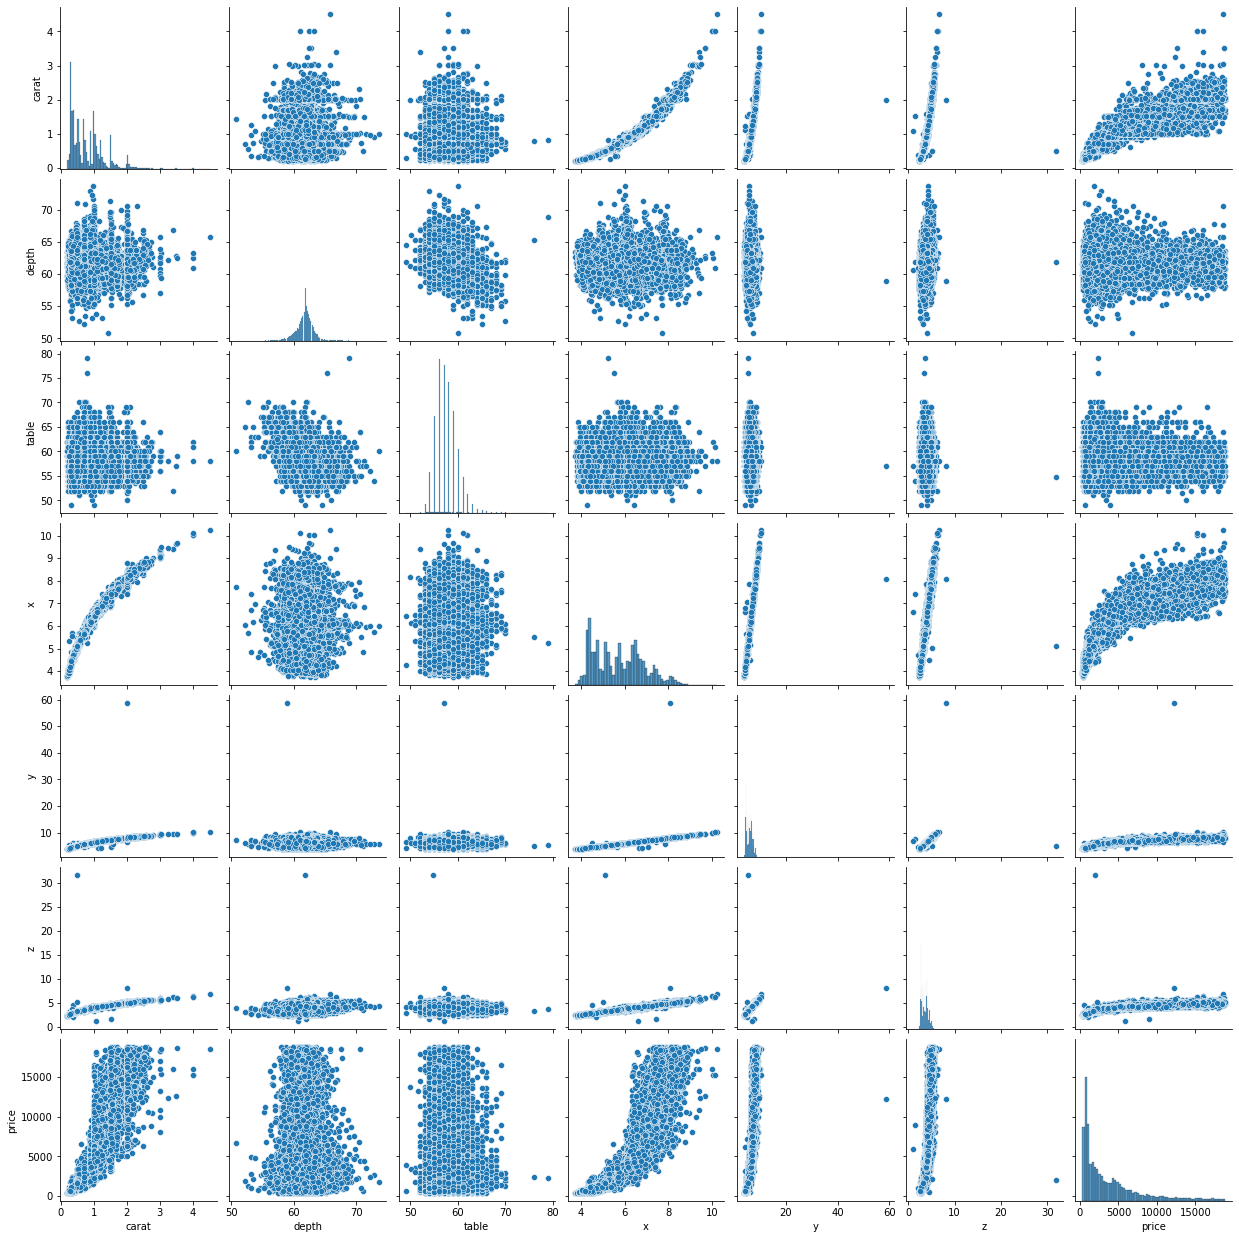

In [45]:
sns.pairplot(df)
plt.show();

<AxesSubplot:xlabel='cut', ylabel='price'>

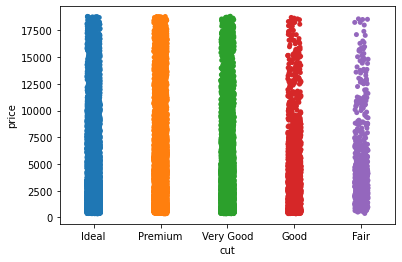

In [46]:
# Let us see how price is linked to Cut
sns.stripplot(df['cut'],df['price'],jitter=True)

<AxesSubplot:xlabel='cut', ylabel='price'>

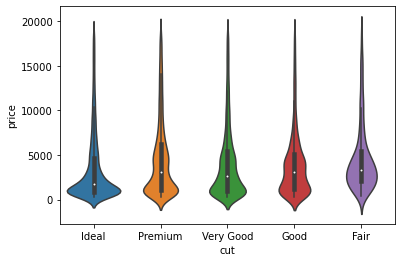

In [47]:
sns.violinplot(df['cut'],df['price'])

<AxesSubplot:xlabel='cut', ylabel='price'>

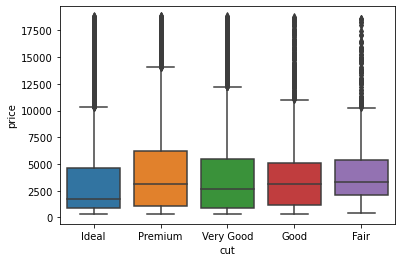

In [48]:
sns.boxplot(df['cut'],df['price'])

<AxesSubplot:xlabel='color', ylabel='price'>

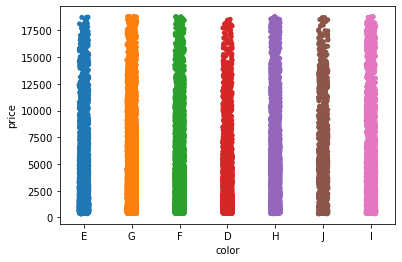

In [49]:
sns.stripplot(df['color'],df['price'],jitter=True)

<AxesSubplot:xlabel='color', ylabel='price'>

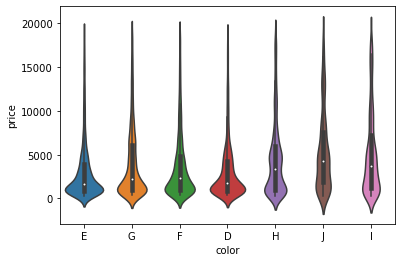

In [50]:
sns.violinplot(df['color'],df['price'])

<AxesSubplot:xlabel='clarity', ylabel='price'>

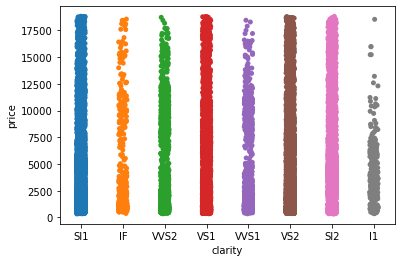

In [51]:
sns.stripplot(df['clarity'],df['price'],jitter=True)

<AxesSubplot:xlabel='clarity', ylabel='price'>

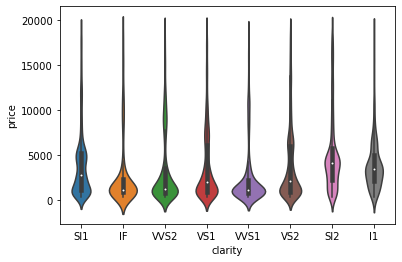

In [52]:
sns.violinplot(df['clarity'],df['price'],jitter=True)

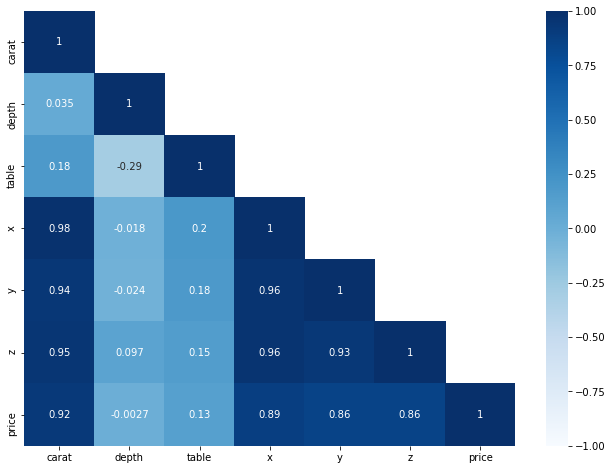

In [53]:
## Correlation Matrix
df_corr=df.corr()
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

In [54]:
# Check for features with >70% correlation 

df_corr[df_corr>0.70]

,carat,depth,table,x,y,z,price
carat,1.000000,NaN,NaN,0.977908,0.942378,0.946774,0.922400
depth,NaN,1.0,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x,0.977908,NaN,NaN,1.000000,0.962510,0.961010,0.887467
y,0.942378,NaN,NaN,0.962510,1.000000,0.932974,0.857255
z,0.946774,NaN,NaN,0.961010,0.932974,1.000000,0.855775
price,0.922400,NaN,NaN,0.887467,0.857255,0.855775,1.000000


## Building LR Model without Outlier Treatment & Any Scaling Transformation being applied

In [180]:
## Converting categorical to dummy variables
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)

In [181]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


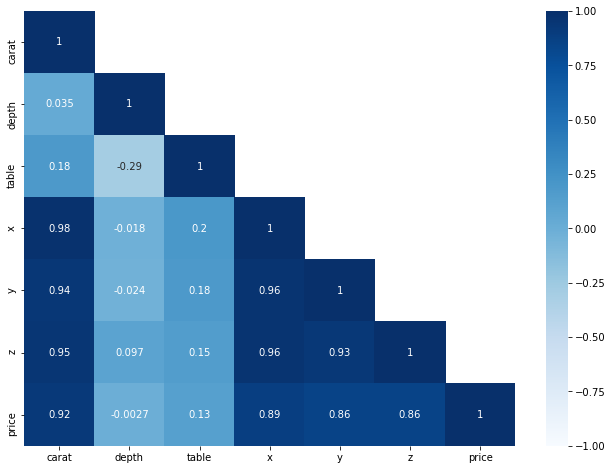

In [57]:
## Correlation Matrix
df_corr=df.corr()
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

In [183]:
df_corr[df_corr>0.70]

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,NaN,NaN,0.977908,0.942378,0.946774,0.922400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,0.977908,NaN,NaN,1.000000,0.962510,0.961010,0.887467,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,0.942378,NaN,NaN,0.962510,1.000000,0.932974,0.857255,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,0.946774,NaN,NaN,0.961010,0.932974,1.000000,0.855775,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.922400,NaN,NaN,0.887467,0.857255,0.855775,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_Ideal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
X=df.drop(['price'],axis=1)

y=df['price']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [186]:
X_train.shape

(18847, 23)

In [187]:
X_test.shape

(8078, 23)

In [188]:
y_train.shape

(18847,)

In [189]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [190]:
cdf = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

               Coefficients
carat          11585.901025
depth            -76.024043
table            -32.881704
x              -1125.687682
y                 -6.139846
z                -45.977157
cut_Good         432.891650
cut_Ideal        678.602412
cut_Premium      587.008523
cut_Very Good    560.054326
clarity_IF      5198.281848
clarity_SI1     3558.247182
clarity_SI2     2580.977984
clarity_VS1     4477.635600
clarity_VS2     4175.111423
clarity_VVS1    4902.021372
clarity_VVS2    4868.781401
color_E         -196.680137
color_F         -263.168948
color_G         -471.270991
color_H         -982.677869
color_I        -1535.895650
color_J        -2334.475224


In [191]:
intercept=reg_model.intercept_
intercept

4056.4323180229258

In [192]:
reg_model.score(X_train,y_train)

0.9201877015245382

In [193]:
reg_model.score(X_test,y_test)

0.9241310825022249

### Using Stats Models


In [194]:
data_train=pd.concat([X_train,y_train],axis=1)

In [195]:
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,1,0,0,0,0,0,4065
12108,1.01,64.0,56.0,6.30,6.38,4.06,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5166
20181,0.67,60.7,61.4,5.60,5.64,3.41,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1708
4712,0.76,57.7,63.0,6.05,5.97,3.47,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2447
2548,1.01,62.8,59.0,6.37,6.34,3.99,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618


In [196]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'price'],
      dtype='object')

In [197]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [198]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'price'],
      dtype='object')

In [199]:
import statsmodels.formula.api as smf

In [200]:
lm1 = smf.ols(formula= 'price ~ carat + cut_Good + cut_Ideal+ cut_Premium+cut_Very_Good + color_E+color_F+color_G+color_H+color_I+color_J + clarity_IF+clarity_SI1 +clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+ clarity_VVS2+depth + table + x+y+z', data = data_train).fit()

In [201]:
lm1.params

Intercept         4056.432318
carat            11585.901025
cut_Good           432.891650
cut_Ideal          678.602412
cut_Premium        587.008523
cut_Very_Good      560.054326
color_E           -196.680137
color_F           -263.168948
color_G           -471.270991
color_H           -982.677869
color_I          -1535.895650
color_J          -2334.475224
clarity_IF        5198.281848
clarity_SI1       3558.247182
clarity_SI2       2580.977984
clarity_VS1       4477.635600
clarity_VS2       4175.111423
clarity_VVS1      4902.021372
clarity_VVS2      4868.781401
depth              -76.024043
table              -32.881704
x                -1125.687682
y                   -6.139846
z                  -45.977157
dtype: float64

In [202]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     9436.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:08:02   Log-Likelihood:            -1.5928e+05
No. Observations:               18847   AIC:                         3.186e+05
Df Residuals:                   18823   BIC:                         3.188e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4056.4323    692.597      5.857

In [203]:
mse=np.mean((reg_model.predict(X_test)-y_test)**2)

In [204]:
import math
math.sqrt(mse)

1115.7269633957753

In [205]:
reg_model.score(X_test,y_test)

0.9241310825022249

In [206]:
y_pred=reg_model.predict(X_test)

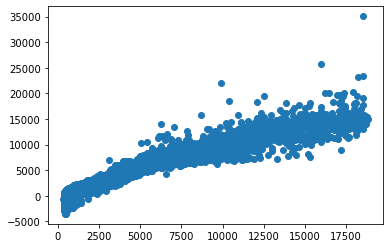

In [207]:
plt.scatter(y_test,y_pred)

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [209]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [210]:
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 84.85295152964473
depth ---> 635.3942162094004
table ---> 641.3974604227727
x ---> 1149.111023905819
y ---> 350.05624778824637
z ---> 387.2814757556599
cut_Good ---> 4.150331564550345
cut_Ideal ---> 15.390619003320793
cut_Premium ---> 9.997926912377029
cut_Very Good ---> 8.824490234875123
clarity_IF ---> 3.606616191994226
clarity_SI1 ---> 19.629950196793615
clarity_SI2 ---> 13.759247415172236
clarity_VS1 ---> 12.664571109760695
clarity_VS2 ---> 18.346193289815815
clarity_VVS1 ---> 6.35596867370127
clarity_VVS2 ---> 8.294195839595382
color_E ---> 2.4807436780832233
color_F ---> 2.447893698502827
color_G ---> 2.7952987097961213
color_H ---> 2.3011027263635326
color_I ---> 1.930797837646708
color_J ---> 1.5177445646393495


## VERSION 2

In [211]:
X=df.drop(['price','y','z'],axis=1)

In [212]:
X.shape

(26925, 21)

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [214]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [215]:
cdf = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

               Coefficients
carat          11583.770945
depth            -78.558051
table            -32.721713
x              -1159.255772
cut_Good         432.197039
cut_Ideal        678.487165
cut_Premium      587.224790
cut_Very Good    558.900792
clarity_IF      5197.742010
clarity_SI1     3558.016641
clarity_SI2     2580.672025
clarity_VS1     4476.787564
clarity_VS2     4174.818485
clarity_VVS1    4901.647324
clarity_VVS2    4868.413546
color_E         -197.037703
color_F         -263.119518
color_G         -471.199411
color_H         -982.716935
color_I        -1535.710091
color_J        -2334.431004


In [216]:
intercept=reg_model.intercept_
intercept

4200.524757651083

In [217]:
reg_model.score(X_train,y_train)

0.9201810416774339

In [218]:
reg_model.score(X_test,y_test)

0.9241265311208888

In [219]:
data_train=pd.concat([X_train,y_train],axis=1)

In [220]:
data_train.head()

,carat,depth,table,x,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price
5030,1.10,63.3,56.0,6.53,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4065
12108,1.01,64.0,56.0,6.30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5166
20181,0.67,60.7,61.4,5.60,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1708
4712,0.76,57.7,63.0,6.05,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2447
2548,1.01,62.8,59.0,6.37,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,6618


In [221]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [222]:
lm1 = smf.ols(formula= 'price ~ carat + cut_Good + cut_Ideal+ cut_Premium+cut_Very_Good + color_E+color_F+color_G+color_H+color_I+color_J + clarity_IF+clarity_SI1 +clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+ clarity_VVS2+depth + table + x', data = data_train).fit()

In [223]:
lm1.params

Intercept         4200.524758
carat            11583.770945
cut_Good           432.197039
cut_Ideal          678.487165
cut_Premium        587.224790
cut_Very_Good      558.900792
color_E           -197.037703
color_F           -263.119518
color_G           -471.199411
color_H           -982.716935
color_I          -1535.710091
color_J          -2334.431004
clarity_IF        5197.742010
clarity_SI1       3558.016641
clarity_SI2       2580.672025
clarity_VS1       4476.787564
clarity_VS2       4174.818485
clarity_VVS1      4901.647324
clarity_VVS2      4868.413546
depth              -78.558051
table              -32.721713
x                -1159.255772
dtype: float64

In [224]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:08:04   Log-Likelihood:            -1.5928e+05
No. Observations:               18847   AIC:                         3.186e+05
Df Residuals:                   18825   BIC:                         3.188e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4200.5248    679.666      6.180

In [225]:
mse=np.mean((reg_model.predict(X_test)-y_test)**2)

In [226]:
math.sqrt(mse)

1115.7604291607304

In [227]:
reg_model.score(X_test,y_test)

0.9241265311208888

In [228]:
y_pred=reg_model.predict(X_test)

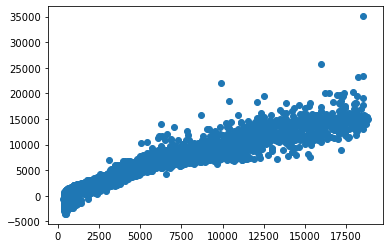

In [229]:
plt.scatter(y_test,y_pred)

In [230]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [231]:
i=0
for column in X.columns:
    if i < 22:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 83.928943981913
depth ---> 560.6060750727835
table ---> 604.4567033897578
x ---> 595.5401501535607
cut_Good ---> 4.1335183283797186
cut_Ideal ---> 15.151109934796636
cut_Premium ---> 9.9105120856087
cut_Very Good ---> 8.75718922443248
clarity_IF ---> 3.6020063321774938
clarity_SI1 ---> 19.61303979622643
clarity_SI2 ---> 13.746116373075116
clarity_VS1 ---> 12.65377970549207
clarity_VS2 ---> 18.32803984971058
clarity_VVS1 ---> 6.348239146903941
clarity_VVS2 ---> 8.284173414674452
color_E ---> 2.4806891872473504
color_F ---> 2.447843664778171
color_G ---> 2.7952947645342725
color_H ---> 2.301009418863069
color_I ---> 1.930763690282107
color_J ---> 1.5177357464003207


## VERSION 3

In [232]:
df_o=df.copy(deep=True)

In [233]:
df_o.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [234]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [235]:
lrcarat,urcarat=remove_outlier(df_o['carat'])
df_o['carat']=np.where(df_o['carat']>urcarat,urcarat,df_o['carat'])
df_o['carat']=np.where(df_o['carat']<lrcarat,lrcarat,df_o['carat'])

lrdepth,urdepth=remove_outlier(df_o['depth'])
df_o['depth']=np.where(df_o['depth']>urdepth,urdepth,df_o['depth'])
df_o['depth']=np.where(df_o['depth']<lrdepth,lrdepth,df_o['depth'])

lrtable,urtable=remove_outlier(df_o['table'])
df_o['table']=np.where(df_o['table']>urtable,urtable,df_o['table'])
df_o['table']=np.where(df_o['table']<lrtable,lrtable,df_o['table'])

lrx,urx=remove_outlier(df_o['x'])
df_o['x']=np.where(df_o['x']>urx,urx,df_o['x'])
df_o['x']=np.where(df_o['x']<lrx,lrx,df_o['x'])

lry,ury=remove_outlier(df_o['y'])
df_o['y']=np.where(df_o['y']>ury,ury,df_o['y'])
df_o['y']=np.where(df_o['y']<lry,lry,df_o['y'])

lrz,urz=remove_outlier(df_o['z'])
df_o['z']=np.where(df_o['z']>urz,urz,df_o['z'])
df_o['z']=np.where(df_o['z']<lrz,lrz,df_o['z'])

lrprice,urprice=remove_outlier(df_o['price'])
df_o['price']=np.where(df_o['price']>urprice,urprice,df_o['price'])
df_o['price']=np.where(df_o['price']<lrprice,lrprice,df_o['price'])




<AxesSubplot:>

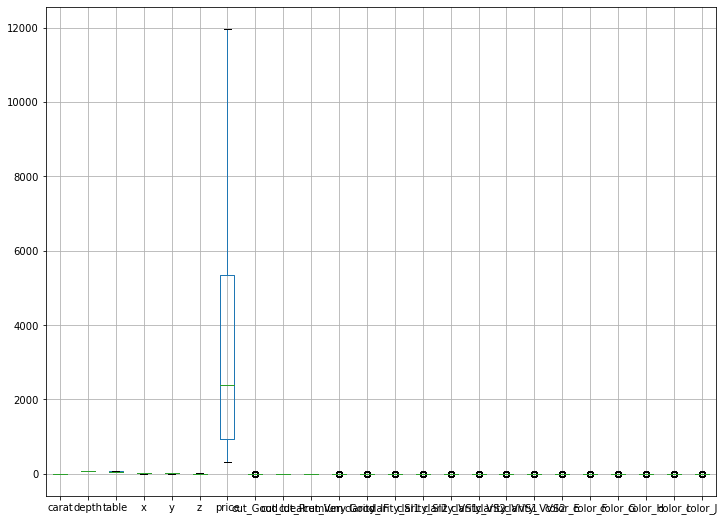

In [236]:
df_o.boxplot(figsize=(12,9))

## Building LR Model after Outlier Treatment & Any Scaling Transformation being applied

In [237]:
X=df_o.drop(['price'],axis=1)

y=df_o['price']

In [238]:
X.shape

(26925, 23)

In [239]:
y.shape

(26925,)

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [241]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [242]:
cdf = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficients'])
print(cdf)

               Coefficients
carat           9200.193371
depth             12.586372
table            -23.069679
x              -1176.947400
y               1083.201384
z               -642.480321
cut_Good         387.245777
cut_Ideal        629.950326
cut_Premium      598.735742
cut_Very Good    502.413685
clarity_IF      3995.216076
clarity_SI1     2535.872401
clarity_SI2     1712.143368
clarity_VS1     3355.098349
clarity_VS2     3072.131071
clarity_VVS1    3776.883566
clarity_VVS2    3766.771189
color_E         -188.879068
color_F         -231.239911
color_G         -411.089989
color_H         -831.529430
color_I        -1330.142254
color_J        -1861.626136


In [243]:
reg_model.coef_

array([ 9200.19337114,    12.58637172,   -23.06967863, -1176.94739961,
        1083.20138373,  -642.48032107,   387.24577716,   629.9503264 ,
         598.73574198,   502.41368508,  3995.2160762 ,  2535.87240069,
        1712.14336778,  3355.09834857,  3072.13107063,  3776.88356629,
        3766.7711891 ,  -188.87906808,  -231.23991128,  -411.08998922,
        -831.52943031, -1330.14225356, -1861.62613582])

In [244]:
intercept=reg_model.intercept_
intercept

-3093.340718318847

In [245]:
reg_model.score(X_train,y_train)

0.9404720478122197

In [246]:
reg_model.score(X_test,y_test)

0.9416173111433775

### Using Stats Models

In [247]:
data_train=pd.concat([X_train,y_train],axis=1)

In [248]:
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,1,0,0,0,0,0,4065.0
12108,1.01,64.0,56.0,6.30,6.38,4.06,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5166.0
20181,0.67,60.7,61.4,5.60,5.64,3.41,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1708.0
4712,0.76,59.0,63.0,6.05,5.97,3.47,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2447.0
2548,1.01,62.8,59.0,6.37,6.34,3.99,0,0,1,0,...,0,0,0,0,0,1,0,0,0,6618.0


In [249]:
data_train.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [250]:
lm1 = smf.ols(formula= 'price ~ carat + cut_Good + cut_Ideal+ cut_Premium+cut_Very_Good + color_E+color_F+color_G+color_H+color_I+color_J + clarity_IF+clarity_SI1 +clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+ clarity_VVS2+depth + table + x+y+z', data = data_train).fit()

In [251]:
lm1.params

Intercept       -3093.340718
carat            9200.193371
cut_Good          387.245777
cut_Ideal         629.950326
cut_Premium       598.735742
cut_Very_Good     502.413685
color_E          -188.879068
color_F          -231.239911
color_G          -411.089989
color_H          -831.529430
color_I         -1330.142254
color_J         -1861.626136
clarity_IF       3995.216076
clarity_SI1      2535.872401
clarity_SI2      1712.143368
clarity_VS1      3355.098349
clarity_VS2      3072.131071
clarity_VVS1     3776.883566
clarity_VVS2     3766.771189
depth              12.586372
table             -23.069679
x               -1176.947400
y                1083.201384
z                -642.480321
dtype: float64

In [252]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:08:07   Log-Likelihood:            -1.5373e+05
No. Observations:               18847   AIC:                         3.075e+05
Df Residuals:                   18823   BIC:                         3.077e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3093.3407    749.338     -4.128

In [253]:
mse=np.mean((reg_model.predict(X_test)-y_test)**2)

In [254]:
math.sqrt(mse)

842.0856562922817

In [255]:
y_pred=reg_model.predict(X_test)

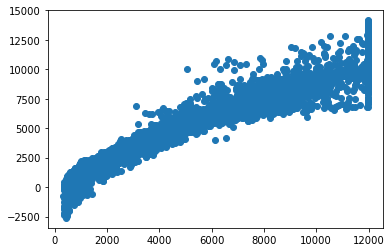

In [256]:
plt.scatter(y_test,y_pred)

In [257]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [258]:
i=0
for column in X.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 124.38428873654838
depth ---> 1408.0033707444913
table ---> 1002.7167198169116
x ---> 11995.441505207684
y ---> 11519.914883935153
z ---> 3445.051673933132
cut_Good ---> 4.504152474360373
cut_Ideal ---> 18.174720557717706
cut_Premium ---> 10.876199824525681
cut_Very Good ---> 10.067970716870153
clarity_IF ---> 3.6756214156685
clarity_SI1 ---> 19.8156077358542
clarity_SI2 ---> 13.903527660990875
clarity_VS1 ---> 12.829470183264275
clarity_VS2 ---> 18.568478057088974
clarity_VVS1 ---> 6.471644906437633
clarity_VVS2 ---> 8.43360634114997
color_E ---> 2.4808398078632
color_F ---> 2.4477783677588576
color_G ---> 2.7951288185087635
color_H ---> 2.3033209090285998
color_I ---> 1.9314707508883817
color_J ---> 1.51433241687946


In [259]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## LASSO

In [58]:
from sklearn.linear_model import Lasso

In [261]:
lasso= Lasso(alpha=20,max_iter=5000)
lasso.fit(X_train,y_train)
print('Lasso model:',(lasso.coef_))

Lasso model: [ 7055.70684065   -58.34817064   -47.28645906     0.
   205.0565642      0.            -0.            59.04674222
     0.             0.           220.87123499  -429.44061662
 -1132.37349573    92.85057609     0.           333.93861483
   452.9935219      0.             0.            -0.
  -314.96197432  -667.26087362 -1006.21735156]


In [262]:
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.9196299596878516
0.9196244710821943


In [263]:
## Linear Regression Version 3 Equation

for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3093.34) * Intercept + (9200.19) * carat + (387.25) * cut_Good + (629.95) * cut_Ideal + (598.74) * cut_Premium + (502.41) * cut_Very_Good + (-188.88) * color_E + (-231.24) * color_F + (-411.09) * color_G + (-831.53) * color_H + (-1330.14) * color_I + (-1861.63) * color_J + (3995.22) * clarity_IF + (2535.87) * clarity_SI1 + (1712.14) * clarity_SI2 + (3355.1) * clarity_VS1 + (3072.13) * clarity_VS2 + (3776.88) * clarity_VVS1 + (3766.77) * clarity_VVS2 + (12.59) * depth + (-23.07) * table + (-1176.95) * x + (1083.2) * y + (-642.48) * z + 

In [265]:
lasso.intercept_

3636.78403167129